In [1]:
import numpy as np
import matplotlib.pylab as plt
import torch
from utils.data import FoodRecognitionDataset
from torch.utils.data import DataLoader

In [2]:
dataset = FoodRecognitionDataset("train", augmentation=False)
len(dataset)

loading annotations into memory...
Done (t=4.21s)
creating index...
index created!


49672

In [3]:
def visualize(index):
    data_item = dataset[index]
    image = data_item["image"]
    all_cat_texts = data_item["all_cat_texts"]
    all_cat_text_tokens = data_item["all_cat_text_tokens"]
    heatmap = data_item["heatmap"]

    print("Shape of the image:", image.shape)
    print("Shape of the heatmap:", heatmap.shape)
    print("Shape of the tokens:", all_cat_text_tokens.shape)

    # print(heatmap.unique())

    image = image.permute(1, 2, 0).numpy() * dataset.PIXEL_STD + dataset.PIXEL_MEAN
    image = np.clip(image, 0, 255)
    image = image.astype(np.uint8)
    plt.imshow(image)
    plt.show()

    for i in range(heatmap.shape[0]):
        if heatmap[i].sum() > 0:
            plt.imshow(image)
            plt.imshow(heatmap[i], alpha=heatmap[i])
            plt.title(all_cat_texts[i])
            plt.show()

36366
Shape of the image: torch.Size([3, 448, 448])
Shape of the heatmap: torch.Size([124, 448, 448])
Shape of the tokens: torch.Size([124, 77])


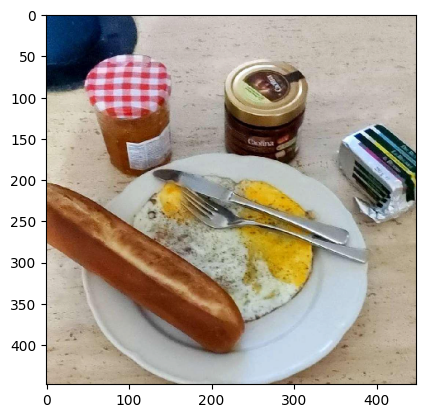

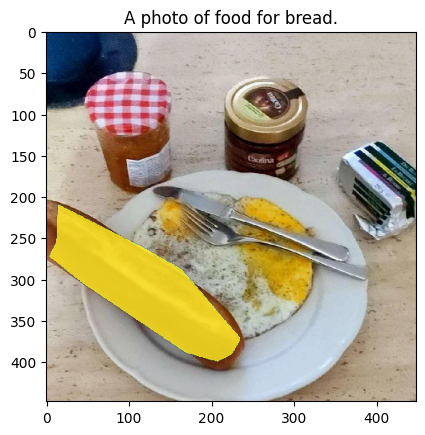

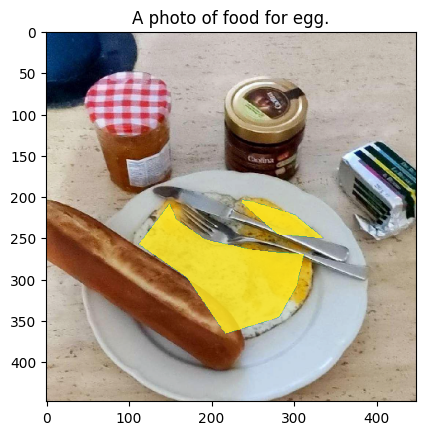

In [7]:
index = np.random.randint(len(dataset))
# index = 40252
print(index)
visualize(index)

In [8]:
len(dataset.new_cat_names)

124